#Q1 a
###Moving Average

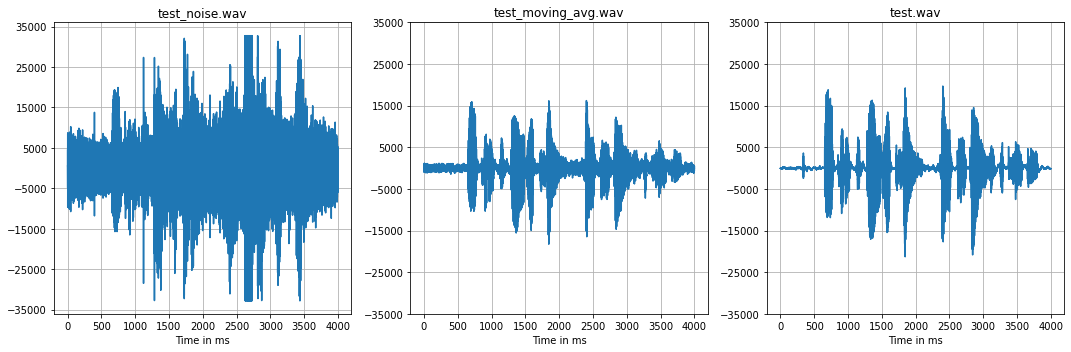

In [ ]:
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import IPython

fig,ax=plt.subplots(1,3,figsize=(15,5))

# Input Data
SR,Data = wav.read('test_noise.wav')

Data_moving_avg=Data.copy()
Data_moving_avg*=0
window_length  = 7
# Moving Average
for x in range(window_length//2,len(Data)-window_length//2):
    Data_moving_avg[x] = Data[x-window_length//2:x+window_length//2+1].sum()/window_length

#Plots
ax[0].plot([t/SR*10**3 for t in range(len(Data))],Data)
ax[0].set_title('test_noise.wav')
ax[0].set_xlabel('Time in ms')
ax[0].set_yticks([i*1000 for i in range(-35,36,10)])
ax[0].grid()

ax[1].plot([t/SR*10**3 for t in range(len(Data))],Data_moving_avg)
ax[1].set_title('test_moving_avg.wav')
ax[1].set_xlabel('Time in ms')
ax[1].set_yticks([i*1000 for i in range(-35,36,10)])
ax[1].grid()

wav.write('test_moving_avg.wav',SR,Data_moving_avg) # Output

SR,Data = wav.read('test.wav')
ax[2].plot([t/SR*10**3 for t in range(len(Data))],Data)
ax[2].set_title('test.wav')
ax[2].set_xlabel('Time in ms')
ax[2].set_yticks([i*1000 for i in range(-35,36,10)])
ax[2].grid()
fig.tight_layout()
plt.show()

IPython.display.display(IPython.display.Audio('test_noise.wav'))
IPython.display.display(IPython.display.Audio('test_moving_avg.wav'))
IPython.display.display(IPython.display.Audio("test.wav"))

# Q1 b
###Frequency domain Filtering


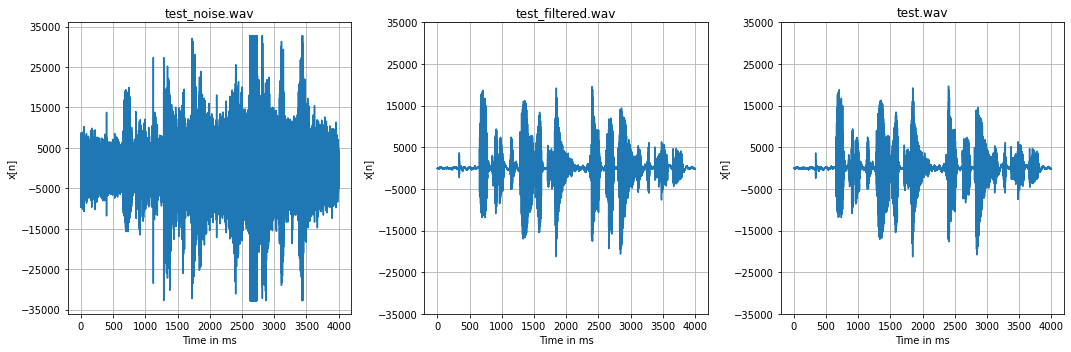

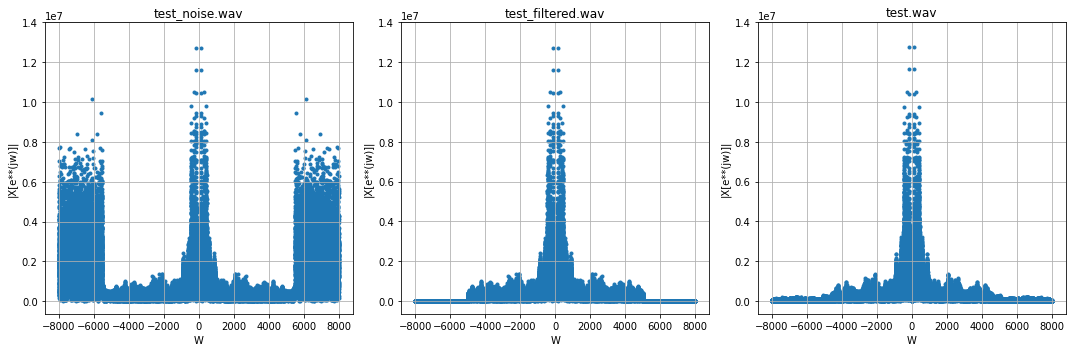

In [ ]:
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import scipy.fftpack as fft
import IPython

fig,ax=plt.subplots(1,3,figsize=(15, 5))
fig1,ax1=plt.subplots(1,3,figsize=(15, 5))

SR,Data = wav.read('test_noise.wav') # Input

# FFT of Input
yf=fft.fft(Data)                # X(e**(jW))
xf=fft.fftfreq(len(Data),1/SR)  # W

#Plots
ax[0].plot([t/SR*10**3 for t in range(len(Data))],Data)
ax[0].set_title('test_noise.wav')
ax[0].set_xlabel('Time in ms')
ax[0].set_ylabel('x[n]')
ax[0].set_yticks([i*1000 for i in range(-35,36,10)])
ax[0].grid()

ax1[0].scatter(xf,abs(yf),marker='.')
ax1[0].set_title('test_noise.wav')
ax1[0].set_xlabel('W')
ax1[0].set_ylabel('|X[e**(jw)]|')
ax1[0].set_yticks([i*10**5 for i in range(0,150,20)])
ax1[0].grid()

yf[abs(xf)>5000] = 0        # Replacing High Frequency Values with 0
Data_filtered=fft.ifft(yf)  #Inverse FFT

ax[1].plot([t/SR*10**3 for t in range(len(Data))],wav.numpy.real(Data_filtered))
ax[1].set_title('test_filtered.wav')
ax[1].set_xlabel('Time in ms')
ax[1].set_ylabel('x[n]')
ax[1].set_yticks([i*1000 for i in range(-35,36,10)])
ax[1].grid()

ax1[1].scatter(xf,abs(yf),marker='.')
ax1[1].set_title('test_filtered.wav')
ax1[1].set_xlabel('W')
ax1[1].set_ylabel('|X[e**(jw)]|')
ax1[1].set_yticks([i*10**5 for i in range(0,150,20)])
ax1[1].grid()

wav.write('test_filtered.wav',SR,wav.numpy.int16(wav.numpy.real(Data_filtered))) # Output

SR,Data = wav.read('test.wav')
yf=fft.fft(Data)
xf=fft.fftfreq(len(Data),1/SR)

ax[2].plot([t/SR*10**3 for t in range(len(Data))],Data)
ax[2].set_title('test.wav')
ax[2].set_xlabel('Time in ms')
ax[2].set_ylabel('x[n]')
ax[2].set_yticks([i*1000 for i in range(-35,36,10)])
ax[2].grid()

ax1[2].scatter(xf,abs(yf),marker='.')
ax1[2].set_title('test.wav')
ax1[2].set_xlabel('W')
ax1[2].set_ylabel('|X[e**(jw)]|')
ax1[2].set_yticks([i*10**5 for i in range(0,150,20)])
ax1[2].grid()

fig.tight_layout()
fig1.tight_layout()
plt.show()

IPython.display.display(IPython.display.Audio('test_noise.wav'))
IPython.display.display(IPython.display.Audio('test_filtered.wav'))
IPython.display.display(IPython.display.Audio("test.wav"))


# Q1 c
###Spectral Subtraction

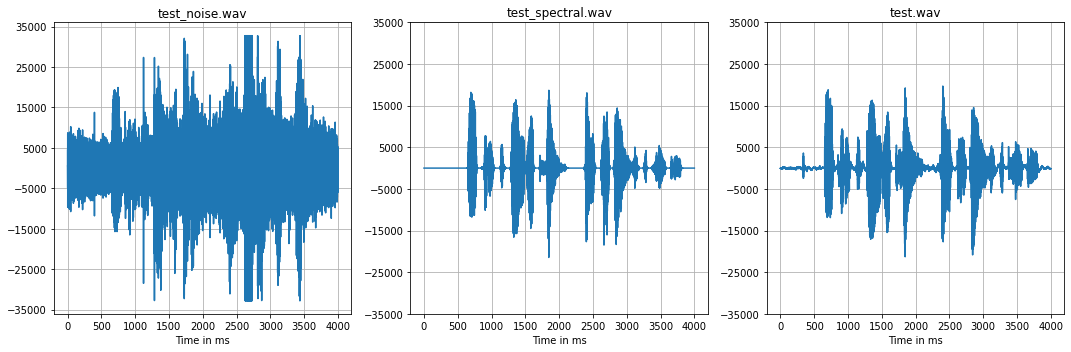

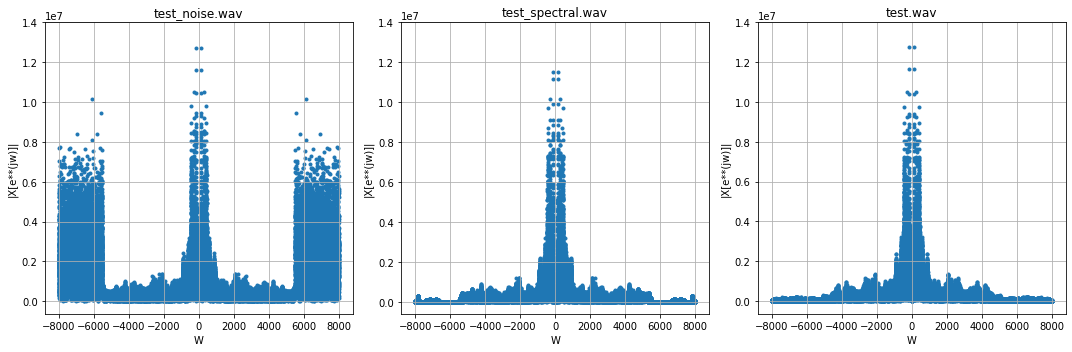

In [ ]:
import scipy.io.wavfile as wav
import scipy.fftpack as fft
import matplotlib.pyplot as plt
import IPython
import numpy as np

# Input Data
SR,Data = wav.read('test_noise.wav')

frames = int(SR * 0.02)  # no. of frames
samples = 400            # Sample length
overlap = samples//2     # Overlap Length

win = np.hamming(samples)            # Hamming Window

# Magintude of FFT of Noise Estimate
# Noise estimation part
Noise_est=np.zeros(samples)

N = 20
for i in range(N):
    frame = win*Data[i*samples:(i+1)*samples]
    Noise_est += abs(fft.fft(frame))

#calculating expectation of noise
#Noise_est=Noise_est/N

#Output Data
Data_spectral = np.copy(Data)
Data_spectral*= 0
prev = np.zeros(overlap,float)

for i in range(frames-1):
    frame = win*Data[i*overlap:(i+2)*overlap]  # Frame

    #FFT
    yf_data=fft.fft(frame)
    phase = wav.numpy.angle(yf_data)

    #Spectral Subtraction
    S = abs(yf_data) - abs(Noise_est)
    S[S<0] = 0
    S = S*np.e**(1j*phase)
    Speech = np.real(fft.ifft(S))               #IFFT

    #overlap addition
    Data_spectral[i*overlap:(i+1)*overlap] = Speech[0:(1)*overlap]+prev
    prev = Speech[(1)*overlap:(2)*overlap]

#Plots
fig,ax=plt.subplots(1,3,figsize=(15, 5))
fig1,ax1=plt.subplots(1,3,figsize=(15, 5))

yf_data=fft.fft(Data)
xf_data=fft.fftfreq(len(Data),1/SR)
phase = wav.numpy.angle(yf_data)

ax[0].plot([t/SR*10**3 for t in range(len(Data))],Data)
ax[0].set_title('test_noise.wav')
ax[0].set_xlabel('Time in ms')
ax[0].set_yticks([i*1000 for i in range(-35,36,10)])
ax[0].grid()

ax1[0].scatter(xf_data,abs(yf_data),marker='.')
ax1[0].set_title('test_noise.wav')
ax1[0].set_xlabel('W')
ax1[0].set_ylabel('|X[e**(jw)]|')
ax1[0].set_yticks([i*10**5 for i in range(0,150,20)])
ax1[0].grid()

yf_data=fft.fft(Data_spectral)
xf_data=fft.fftfreq(len(Data_spectral),1/SR)
phase = wav.numpy.angle(yf_data)

ax[1].plot([t/SR*10**3 for t in range(len(Data))],Data_spectral)
ax[1].set_title('test_spectral.wav')
ax[1].set_xlabel('Time in ms')
ax[1].set_yticks([i*1000 for i in range(-35,36,10)])
ax[1].grid()

ax1[1].scatter(xf_data,abs(yf_data),marker='.')
ax1[1].set_title('test_spectral.wav')
ax1[1].set_xlabel('W')
ax1[1].set_ylabel('|X[e**(jw)]|')
ax1[1].set_yticks([i*10**5 for i in range(0,150,20)])
ax1[1].grid()

wav.write('test_spectral.wav',SR,wav.numpy.int16(Data_spectral))

SR,Data = wav.read('test.wav')
yf_data=fft.fft(Data)
xf_data=fft.fftfreq(len(Data),1/SR)

ax[2].plot([t/SR*10**3 for t in range(len(Data))],Data)
ax[2].set_title('test.wav')
ax[2].set_xlabel('Time in ms')
ax[2].set_yticks([i*1000 for i in range(-35,36,10)])
ax[2].grid()

ax1[2].scatter(xf_data,abs(yf_data),marker='.')
ax1[2].set_title('test.wav')
ax1[2].set_xlabel('W')
ax1[2].set_ylabel('|X[e**(jw)]|')
ax1[2].set_yticks([i*10**5 for i in range(0,150,20)])
ax1[2].grid()

fig.tight_layout()
fig1.tight_layout()
plt.show()

#playing audio
IPython.display.display(IPython.display.Audio('test_noise.wav'))
IPython.display.display(IPython.display.Audio('test_spectral.wav'))
IPython.display.display(IPython.display.Audio("test.wav"))

# Q2 image-36

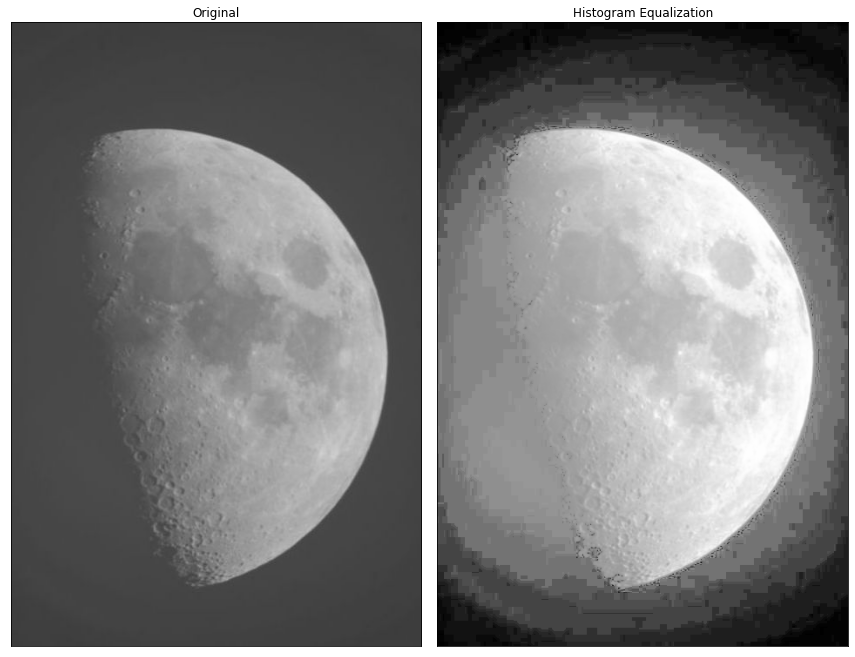

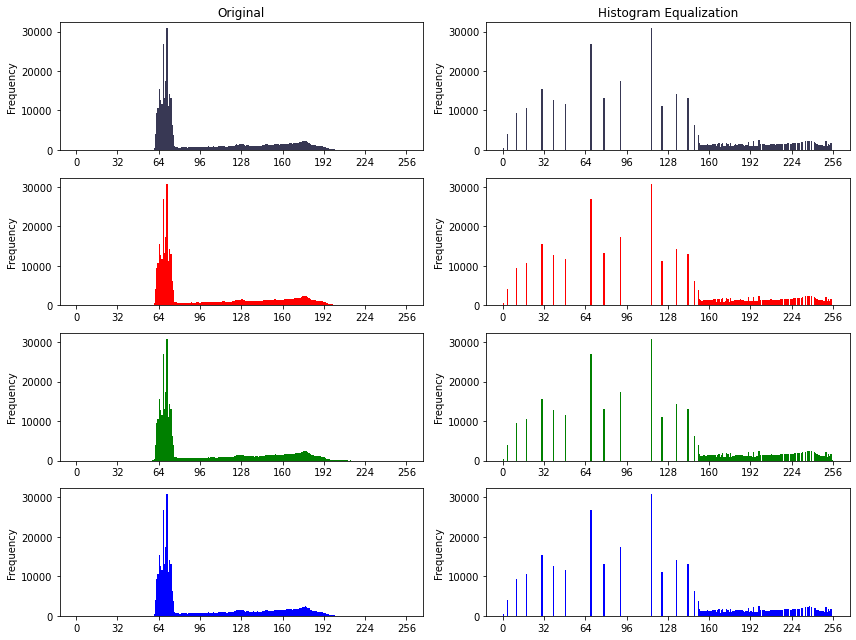

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
image = plt.imread(fname="image-36.jpg",format=None)
image=np.int64(image)

fig1,ax1=plt.subplots(1,2,figsize=(12,9))
fig,ax=plt.subplots(4,2,figsize=(12,9))

ax1[0].imshow(image)
ax1[0].set_title("Original")
ax1[0].set_xticks([])
ax1[0].set_yticks([])

ax[0][0].hist(image.T[0].flatten(),bins=256,range=(0,256),color='red',alpha=1)
ax[0][0].hist(image.T[1].flatten(),bins=256,range=(0,256),color='green',alpha=2/3)
ax[0][0].hist(image.T[2].flatten(),bins=256,range=(0,256),color='blue',alpha=1/3)


ax[1][0].hist(image.T[0].flatten(),bins=256,range=(0,256),color='red')
ax[2][0].hist(image.T[1].flatten(),bins=256,range=(0,256),color='green')
ax[3][0].hist(image.T[2].flatten(),bins=256,range=(0,256),color='blue')

ax[0][0].set_xticks(range(0,257,32))
ax[0][0].set_ylabel("Frequency")
ax[0][0].set_title("Original")
ax[1][0].set_xticks(range(0,257,32))
ax[1][0].set_ylabel("Frequency")
ax[2][0].set_xticks(range(0,257,32))
ax[2][0].set_ylabel("Frequency")
ax[3][0].set_xticks(range(0,257,32))
ax[3][0].set_ylabel("Frequency")

H1 = np.zeros(256)
H2 = np.zeros(256)
H3 = np.zeros(256)
# Frequency Distribution
for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        H1[image[x][y][0]]+=1
        H2[image[x][y][1]]+=1
        H3[image[x][y][2]]+=1
# Cumulative Frequency
H1=H1.cumsum()
H2=H2.cumsum()
H3=H3.cumsum()
image_1=np.zeros(image.shape[0:2])
image_2=np.zeros(image.shape[0:2])
image_3=np.zeros(image.shape[0:2])
#Transforming w.r.t Cumulative Frequency
for x in range(image.shape[0]):
    for y in range(image.shape[1]):
       image_1[x][y]=(H1[image[x][y][0]]-H1[H1!=0].min())/(image.shape[0]*image.shape[1]-H1[H1!=0].min())*(255)
       image_2[x][y]=(H2[image[x][y][1]]-H2[H2!=0].min())/(image.shape[0]*image.shape[1]-H2[H2!=0].min())*(255)
       image_3[x][y]=(H3[image[x][y][2]]-H3[H3!=0].min())/(image.shape[0]*image.shape[1]-H3[H3!=0].min())*(255)

image_f=np.array([image_1.T,image_2.T,image_3.T]).T
image_f=np.uint8(image_f)
ax1[1].imshow(image_f)
ax1[1].set_title('Histogram Equalization')
ax1[1].set_xticks([])
ax1[1].set_yticks([])

ax[0][1].hist(image_f.T[0].flatten(),bins=256,range=(0,256),color='red',alpha=1)
ax[0][1].hist(image_f.T[1].flatten(),bins=256,range=(0,256),color='green',alpha=2/3)
ax[0][1].hist(image_f.T[2].flatten(),bins=256,range=(0,256),color='blue',alpha=1/3)


ax[1][1].hist(image_f.T[0].flatten(),bins=256,range=(0,256),color='red')
ax[2][1].hist(image_f.T[1].flatten(),bins=256,range=(0,256),color='green')
ax[3][1].hist(image_f.T[2].flatten(),bins=256,range=(0,256),color='blue')

ax[0][1].set_xticks(range(0,257,32))
ax[0][1].set_ylabel("Frequency")
ax[0][1].set_title("Histogram Equalization")
ax[1][1].set_xticks(range(0,257,32))
ax[1][1].set_ylabel("Frequency")
ax[2][1].set_xticks(range(0,257,32))
ax[2][1].set_ylabel("Frequency")
ax[3][1].set_xticks(range(0,257,32))
ax[3][1].set_ylabel("Frequency")

fig.tight_layout()
fig1.tight_layout()
plt.imsave("image-36 Histogram Equalization.jpg",image_f,format='jpg')

# Q2 Images


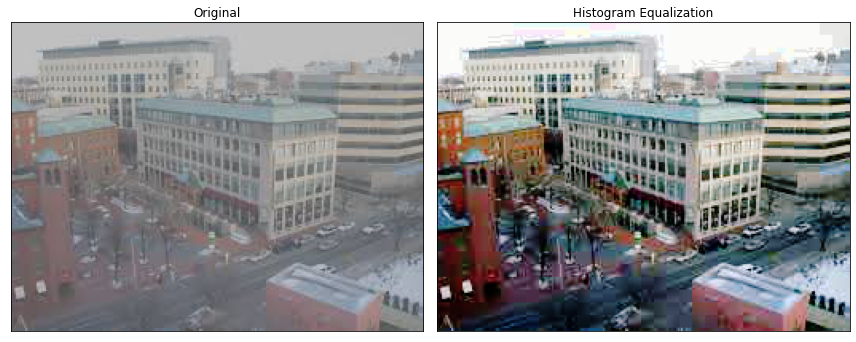

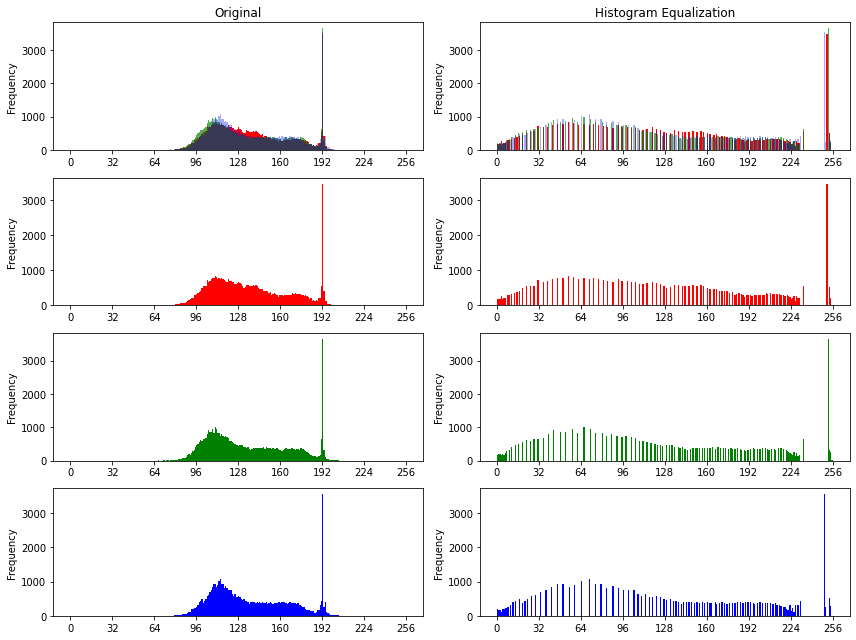

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
image = plt.imread(fname="images.jpg",format=None)
image=np.int64(image)

fig1,ax1=plt.subplots(1,2,figsize=(12,9))
fig,ax=plt.subplots(4,2,figsize=(12,9))

ax1[0].imshow(image)
ax1[0].set_title("Original")
ax1[0].set_xticks([])
ax1[0].set_yticks([])

ax[0][0].hist(image.T[0].flatten(),bins=256,range=(0,256),color='red',alpha=1)
ax[0][0].hist(image.T[1].flatten(),bins=256,range=(0,256),color='green',alpha=2/3)
ax[0][0].hist(image.T[2].flatten(),bins=256,range=(0,256),color='blue',alpha=1/3)


ax[1][0].hist(image.T[0].flatten(),bins=256,range=(0,256),color='red')
ax[2][0].hist(image.T[1].flatten(),bins=256,range=(0,256),color='green')
ax[3][0].hist(image.T[2].flatten(),bins=256,range=(0,256),color='blue')

ax[0][0].set_xticks(range(0,257,32))
ax[0][0].set_ylabel("Frequency")
ax[0][0].set_title("Original")
ax[1][0].set_xticks(range(0,257,32))
ax[1][0].set_ylabel("Frequency")
ax[2][0].set_xticks(range(0,257,32))
ax[2][0].set_ylabel("Frequency")
ax[3][0].set_xticks(range(0,257,32))
ax[3][0].set_ylabel("Frequency")

H1 = np.zeros(256)
H2 = np.zeros(256)
H3 = np.zeros(256)
# Frequency Distribution
for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        H1[image[x][y][0]]+=1
        H2[image[x][y][1]]+=1
        H3[image[x][y][2]]+=1
# Cumulative Frequency
H1=H1.cumsum()
H2=H2.cumsum()
H3=H3.cumsum()
image_1=np.zeros(image.shape[0:2])
image_2=np.zeros(image.shape[0:2])
image_3=np.zeros(image.shape[0:2])
#Transforming w.r.t Cumulative Frequency
for x in range(image.shape[0]):
    for y in range(image.shape[1]):
       image_1[x][y]=(H1[image[x][y][0]]-H1[H1!=0].min())/(image.shape[0]*image.shape[1]-H1[H1!=0].min())*(255)
       image_2[x][y]=(H2[image[x][y][1]]-H2[H2!=0].min())/(image.shape[0]*image.shape[1]-H2[H2!=0].min())*(255)
       image_3[x][y]=(H3[image[x][y][2]]-H3[H3!=0].min())/(image.shape[0]*image.shape[1]-H3[H3!=0].min())*(255)

image_f=np.array([image_1.T,image_2.T,image_3.T]).T
image_f=np.uint8(image_f)
ax1[1].imshow(image_f)
ax1[1].set_title('Histogram Equalization')
ax1[1].set_xticks([])
ax1[1].set_yticks([])

ax[0][1].hist(image_f.T[0].flatten(),bins=256,range=(0,256),color='red',alpha=1)
ax[0][1].hist(image_f.T[1].flatten(),bins=256,range=(0,256),color='green',alpha=2/3)
ax[0][1].hist(image_f.T[2].flatten(),bins=256,range=(0,256),color='blue',alpha=1/3)


ax[1][1].hist(image_f.T[0].flatten(),bins=256,range=(0,256),color='red')
ax[2][1].hist(image_f.T[1].flatten(),bins=256,range=(0,256),color='green')
ax[3][1].hist(image_f.T[2].flatten(),bins=256,range=(0,256),color='blue')

ax[0][1].set_xticks(range(0,257,32))
ax[0][1].set_ylabel("Frequency")
ax[0][1].set_title("Histogram Equalization")
ax[1][1].set_xticks(range(0,257,32))
ax[1][1].set_ylabel("Frequency")
ax[2][1].set_xticks(range(0,257,32))
ax[2][1].set_ylabel("Frequency")
ax[3][1].set_xticks(range(0,257,32))
ax[3][1].set_ylabel("Frequency")

fig.tight_layout()
fig1.tight_layout()
plt.imsave("images Histogram Equalization.jpg",image_f,format='jpg')